In [53]:
import yfinance as yf
import pandas as pd
from yahoofinancials import YahooFinancials
from datetime import date, timedelta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [25]:
stocks = ['V', 'C', 'UAL', 'WDC', 'BAC', 'CMCSA', 'KO', 'PFE']

my_columns = ['Ticker', 'Industry', 'Beta']
data = pd.DataFrame(columns = my_columns)
data = pd.DataFrame()

#extraction of beta data
for stock in stocks: 
    info = yf.Ticker(stock).info
    industry = info.get('industry')
    beta = info.get('beta')
    data = data.append(
                   pd.Series([stock, industry, beta],
                            index = my_columns), ignore_index = True) 
data

,Ticker,Industry,Beta
0,V,Credit Services,NaN
1,C,Banks—Diversified,1.793208
2,UAL,Airlines,1.473390
3,WDC,Computer Hardware,1.535225
4,BAC,Banks—Diversified,1.491130
5,CMCSA,Entertainment,0.944247
6,KO,Beverages—Non-Alcoholic,0.712113
7,PFE,Drug Manufacturers—General,0.642676


In [30]:
### MRP AND RF ARE TO BE UPDATED PRIOR TO RUNNING THE CODE!!!!!!!!!!!!!

mrp = 5.5 #market risk premium
rf = 1.78 #risk free rate of return
returns = []
for beta in data['Beta']:
    try:
        returns.append(rf + beta * mrp)
    except:
        returns.append('')
        
data['E[R]'] = returns
data
#creation of dataframe with data for ticker, industry of the comapny return estimated
#beta and the expected return

,Ticker,Industry,Beta,E[R]
0,V,Credit Services,NaN,NaN
1,C,Banks—Diversified,1.793208,11.642644
2,UAL,Airlines,1.473390,9.883645
3,WDC,Computer Hardware,1.535225,10.223738
4,BAC,Banks—Diversified,1.491130,9.981215
5,CMCSA,Entertainment,0.944247,6.973358
6,KO,Beverages—Non-Alcoholic,0.712113,5.696622
7,PFE,Drug Manufacturers—General,0.642676,5.314718


In [43]:
def volatility(ticker):
    '''
    A function calculates daily volatility based on previous annum day volatilities availible
    Input variables: ticker (string variable which defines the ticker of stock you want to have volatility of)
    Output variables: float variable of annual average daily volatility
    '''
    # set stock ticker symbol
    stock_symbol = ticker

    # set date range for historical prices
    end_time = date.today()
    start_time = end_time - timedelta(days=365)

    # reformat date range
    end = end_time.strftime('%Y-%m-%d')
    start = start_time.strftime('%Y-%m-%d')

    # get daily stock prices over date range
    json_prices = YahooFinancials(stock_symbol
    ).get_historical_price_data(start, end, 'daily')
    prices = pd.DataFrame(json_prices[stock_symbol]
    ['prices'])[['formatted_date', 'close']]

    # sort dates in descending order
    prices.sort_index(ascending=False, inplace=True)
    # calculate daily logarithmic return
    prices['returns'] = (np.log(prices.close /
    prices.close.shift(-1)))

    # calculate daily standard deviation of returns
    daily_std = np.std(prices.returns)

    # annualized daily standard deviation
    std = daily_std * 252 ** 0.5
    return std

In [47]:
#calculate volatilities
vol = []
for i in range(len(data)):
    try:
        vol.append(volatility(data['Ticker'][i]))
    except:
        vol.append('')
data['Volatility'] = vol
data

,Ticker,Industry,Beta,E[R],Volatility
0,V,Credit Services,NaN,NaN,0.239976
1,C,Banks—Diversified,1.793208,11.642644,0.243099
2,UAL,Airlines,1.473390,9.883645,0.436829
3,WDC,Computer Hardware,1.535225,10.223738,0.416919
4,BAC,Banks—Diversified,1.491130,9.981215,0.250157
5,CMCSA,Entertainment,0.944247,6.973358,0.228802
6,KO,Beverages—Non-Alcoholic,0.712113,5.696622,0.139773
7,PFE,Drug Manufacturers—General,0.642676,5.314718,0.269019


Text(0.5, 1.0, 'CAPM predictions on stocks expected returns and volatilitites')

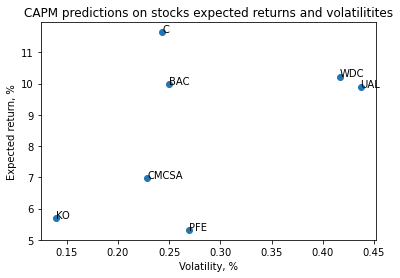

In [68]:
z = list(data['Volatility'][1:])
y = list(data['E[R]'][1:])
n = list(data['Ticker'][1:])

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))
plt.xlabel('Volatility, %')
plt.ylabel('Expected return, %')
plt.title('CAPM predictions on stocks expected returns and volatilitites')


/Users/yurishabanov/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


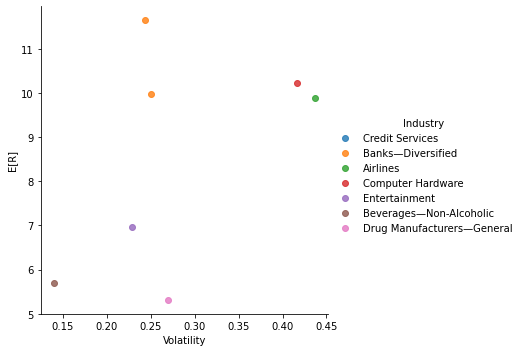

In [61]:
import seaborn as sns
sns.lmplot('Volatility', 'E[R]', data=data, hue='Industry', fit_reg=False)
plt.text(df.G[df.Team=='TOT'],df.GA[df.Team=='TOT'],"TOT", color='red')

<AxesSubplot:xlabel='Volatility', ylabel='E[R]'>

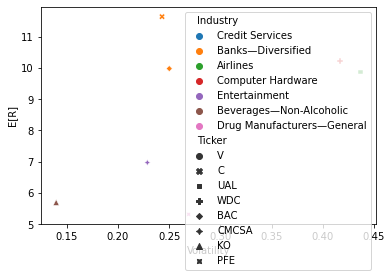

In [66]:
sns.scatterplot(data = data, x = 'Volatility', y = 'E[R]',
               hue = 'Industry',
               markers = True,
               style = 'Ticker')